## Context of Data
1. The dataset is from an online shopping app and consists of more than 12 Million rows and 6 columns;
2. Customer segment: individual user;
3. Transaction period: 11/18/2014 to 12/18/2014.

## Tasks
1. Obtain Daily & Hourly Page View(PV) and Daily & Hourly Unique Visitor(UV);
2. Obtain ARPPU, ARPU，order Conversion Rate, and hourly order frequency distribution;
3. Conduct customer retention analysis;
4. Conduct Funnel Analysis;
5. Conduct RFM Analysis.

## Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', font_scale = 1.5)

import os
os.chdir(r'/Users/xuefeng/Desktop/Project')

## Load Data and Understand Data

In [3]:
# Load data and read data type as string
app_data = pd.read_csv('mobile_app_data.csv', dtype = str)

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [5]:
app_data.head(10)

user_id    item_id behavior_type user_geohash item_category  \
0   98047837  232431562             1          NaN          4245   
1   97726136  383583590             1          NaN          5894   
2   98607707   64749712             1          NaN          2883   
3   98662432  320593836             1      96nn52n          6562   
4   98145908  290208520             1          NaN         13926   
5   93784494  337869048             1          NaN          3979   
6   94832743  105749725             1          NaN          9559   
7   95290487   76866650             1          NaN         10875   
8   96610296  161166643             1          NaN          3064   
9  100684618   21751142             3          NaN          2158   

            time  
0  2014-12-06 02  
1  2014-12-09 20  
2  2014-12-18 11  
3  2014-12-06 10  
4  2014-12-16 21  
5  2014-12-03 20  
6  2014-12-13 20  
7  2014-11-27 16  
8  2014-12-11 23  
9  2014-12-05 23

#### behavior_type: 
1 - Click;\
2 - Favourite;\
3 - Add to Cart;\
4 - Place Order.

## Clean Data

### 1. Check missing values rate for each column
The missing value rate for user_geohash is 68%, since it is not relevent to the tasks we are focusing on, so we can ignore the missing values for this column in this case. 

In [6]:
app_data.apply(lambda x: sum(x.isnull()) / len(x))

user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

### 2. Change 'time' from String to DateTime, and split to 'date' and 'hour'

In [7]:
# Extract date from 'time' column
app_data['date'] = app_data['time'].str[0:10]

In [8]:
# Extract hour from 'time' column
app_data['hour'] = app_data['time'].str[11:]

In [9]:
app_data.head()

user_id    item_id behavior_type user_geohash item_category  \
0  98047837  232431562             1          NaN          4245   
1  97726136  383583590             1          NaN          5894   
2  98607707   64749712             1          NaN          2883   
3  98662432  320593836             1      96nn52n          6562   
4  98145908  290208520             1          NaN         13926   

            time        date hour  
0  2014-12-06 02  2014-12-06   02  
1  2014-12-09 20  2014-12-09   20  
2  2014-12-18 11  2014-12-18   11  
3  2014-12-06 10  2014-12-06   10  
4  2014-12-16 21  2014-12-16   21

In [10]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
 6   date           object
 7   hour           object
dtypes: object(8)
memory usage: 748.1+ MB


In [11]:
# Change the data type for 'time', 'date' and 'hour'
app_data['time'] = pd.to_datetime(app_data['time'])
app_data['date'] = pd.to_datetime(app_data['date'])
app_data['hour'] = app_data['hour'].astype(int)

In [12]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   item_id        object        
 2   behavior_type  object        
 3   user_geohash   object        
 4   item_category  object        
 5   time           datetime64[ns]
 6   date           datetime64[ns]
 7   hour           int64         
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 748.1+ MB


In [13]:
app_data.head()

user_id    item_id behavior_type user_geohash item_category  \
0  98047837  232431562             1          NaN          4245   
1  97726136  383583590             1          NaN          5894   
2  98607707   64749712             1          NaN          2883   
3  98662432  320593836             1      96nn52n          6562   
4  98145908  290208520             1          NaN         13926   

                 time       date  hour  
0 2014-12-06 02:00:00 2014-12-06     2  
1 2014-12-09 20:00:00 2014-12-09    20  
2 2014-12-18 11:00:00 2014-12-18    11  
3 2014-12-06 10:00:00 2014-12-06    10  
4 2014-12-16 21:00:00 2014-12-16    21

### 3. Check Outlier Values

In [14]:
# Sort the data by time in ascending order
app_data.sort_values(by = 'time', ascending = True, inplace = True)

In [15]:
# Reset index
app_data.reset_index(drop = True, inplace = True)

In [16]:
app_data.head()

user_id    item_id behavior_type user_geohash item_category       time  \
0   73462715  378485233             1          NaN          9130 2014-11-18   
1   36090137  236748115             1          NaN         10523 2014-11-18   
2   40459733  155218177             1          NaN          8561 2014-11-18   
3     814199  149808524             1          NaN          9053 2014-11-18   
4  113309982    5730861             1          NaN          3783 2014-11-18   

        date  hour  
0 2014-11-18     0  
1 2014-11-18     0  
2 2014-11-18     0  
3 2014-11-18     0  
4 2014-11-18     0

In [17]:
app_data.describe(include = 'all')

user_id    item_id behavior_type user_geohash item_category  \
count   12256906   12256906      12256906      3922082      12256906   
unique     10000    2876947             4       575458          8916   
top     36233277  112921337             1      94ek6ke          1863   
freq       31030       1445      11550581         1052        393247   
first        NaN        NaN           NaN          NaN           NaN   
last         NaN        NaN           NaN          NaN           NaN   
mean         NaN        NaN           NaN          NaN           NaN   
std          NaN        NaN           NaN          NaN           NaN   
min          NaN        NaN           NaN          NaN           NaN   
25%          NaN        NaN           NaN          NaN           NaN   
50%          NaN        NaN           NaN          NaN           NaN   
75%          NaN        NaN           NaN          NaN           NaN   
max          NaN        NaN           NaN          NaN           NaN   

                       time                 date          hour  
count              12256906             12256906  1.225691e+07  
unique                  744                   31           NaN  
top     2014-12-11 22:00:00  2014-12-12 00:00:00           NaN  
freq                  54797               691712           NaN  
first   2014-11-18 00:00:00  2014-11-18 00:00:00           NaN  
last    2014-12-18 23:00:00  2014-12-18 00:00:00           NaN  
mean                    NaN                  NaN  1.481799e+01  
std                     NaN                  NaN  6.474778e+00  
min                     NaN                  NaN  0.000000e+00  
25%                     NaN                  NaN  1.000000e+01  
50%                     NaN                  NaN  1.600000e+01  
75%                     NaN                  NaN  2.000000e+01  
max                     NaN                  NaN  2.300000e+01

In [18]:
# Check if there are only 4 behavior types 
app_data.behavior_type.value_counts()

1    11550581
3      343564
2      242556
4      120205
Name: behavior_type, dtype: int64

### 4. Drop Duplicates

In [19]:
# Check the amount of duplicate values
app_data.duplicated().value_counts()

False    8164040
True     4092866
dtype: int64

In [20]:
# Drop duplicates
app_data = app_data.drop_duplicates(keep = 'last')

In [21]:
app_data.duplicated().value_counts()

False    8164040
dtype: int64

## Data Analysis and Data Visualization

### 1. Daily Page View (PV)

In [22]:
# Calculate Daily Page View
pv_daily = app_data.groupby('date').count()['user_id']

In [23]:
pv_daily.head()

date
2014-11-18    235493
2014-11-19    233144
2014-11-20    226523
2014-11-21    213894
2014-11-22    232994
Name: user_id, dtype: int64

### 2. Daily Unique Visitor (UV)

In [24]:
# Calculate Daily Unique Visitors
uv_daily = app_data.groupby('date').nunique()['user_id']

In [25]:
uv_daily.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [26]:
# Concat daily PV and UV and rename columns
pv_uv_daily = pd.concat([pv_daily, uv_daily], axis = 1)
pv_uv_daily.columns = ['daily pv', 'daily uv']

In [27]:
pv_uv_daily.head()

daily pv  daily uv
date                          
2014-11-18    235493      6343
2014-11-19    233144      6420
2014-11-20    226523      6333
2014-11-21    213894      6276
2014-11-22    232994      6187

In [28]:
# Calculate spearman correlation coefficient
pv_uv_daily.corr(method = 'spearman')

daily pv  daily uv
daily pv  1.000000  0.912903
daily uv  0.912903  1.000000

In [29]:
# Calculate pearson correlation
pv_uv_daily.corr(method = 'pearson')

daily pv  daily uv
daily pv  1.000000  0.949427
daily uv  0.949427  1.000000

**Based on the spearman and pearson correlation, daily pv and uv are a strong positive relationship.**

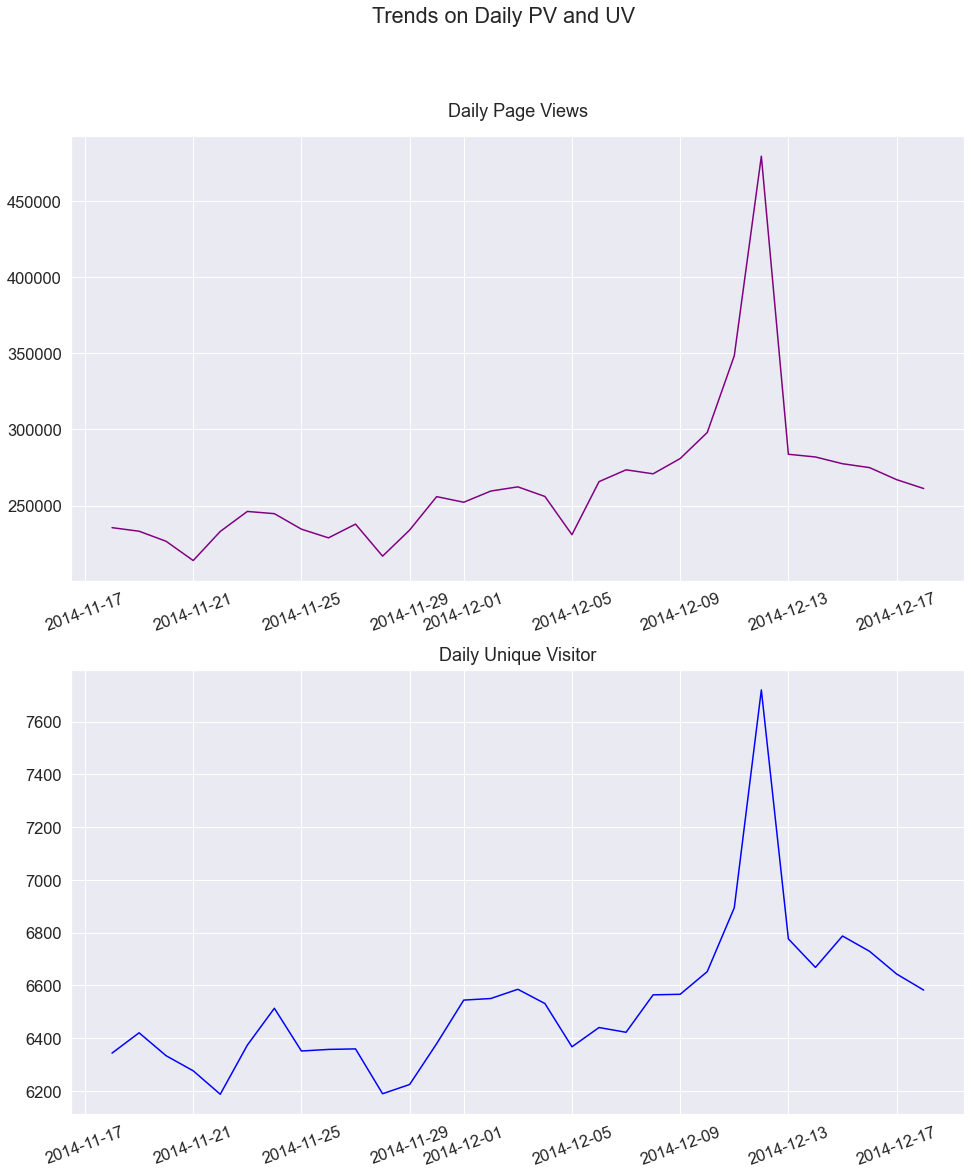

In [30]:
plt.figure(figsize = (16,18))

plt.subplot(211)
plt.plot(pv_daily, color = 'purple')
plt.title('Daily Page Views', pad = 20)
plt.xticks(rotation = 20)

plt.subplot(212)
plt.plot(uv_daily, color = 'blue')
plt.title('Daily Unique Visitor', pad = 10)
plt.xticks(rotation = 20)
plt.suptitle('Trends on Daily PV and UV')
plt.show()

### 3. Hourly Page Views (PV)

In [31]:
# Calculate hourly page views
pv_hourly = app_data.groupby('hour').count()['user_id']

In [32]:
pv_hourly.head()

hour
0    264993
1    138190
2     76170
3     51872
4     41865
Name: user_id, dtype: int64

### 4. Hourly Unique Visitor (UV)

In [33]:
# Calculate hourly unique visitor
uv_hourly = app_data.groupby(['hour']).nunique()['user_id']

In [34]:
uv_hourly.head()

hour
0    5786
1    3780
2    2532
3    1937
4    1765
Name: user_id, dtype: int64

In [35]:
# Concat hourly pv and uv and rename columns
pv_uv_hourly = pd.concat([pv_hourly, uv_hourly], axis = 1)
pv_uv_hourly.columns = ['hourly pv', 'hourly uv']

In [36]:
pv_uv_hourly.head()

hourly pv  hourly uv
hour                      
0        264993       5786
1        138190       3780
2         76170       2532
3         51872       1937
4         41865       1765

In [37]:
pv_uv_hourly.corr(method = 'spearman')

hourly pv  hourly uv
hourly pv    1.00000    0.91913
hourly uv    0.91913    1.00000

In [38]:
pv_uv_hourly.corr(method = 'pearson')

hourly pv  hourly uv
hourly pv   1.000000   0.847722
hourly uv   0.847722   1.000000

**Based on the spearman and pearson correlation, daily pv and uv are also a strong positive relationship.**

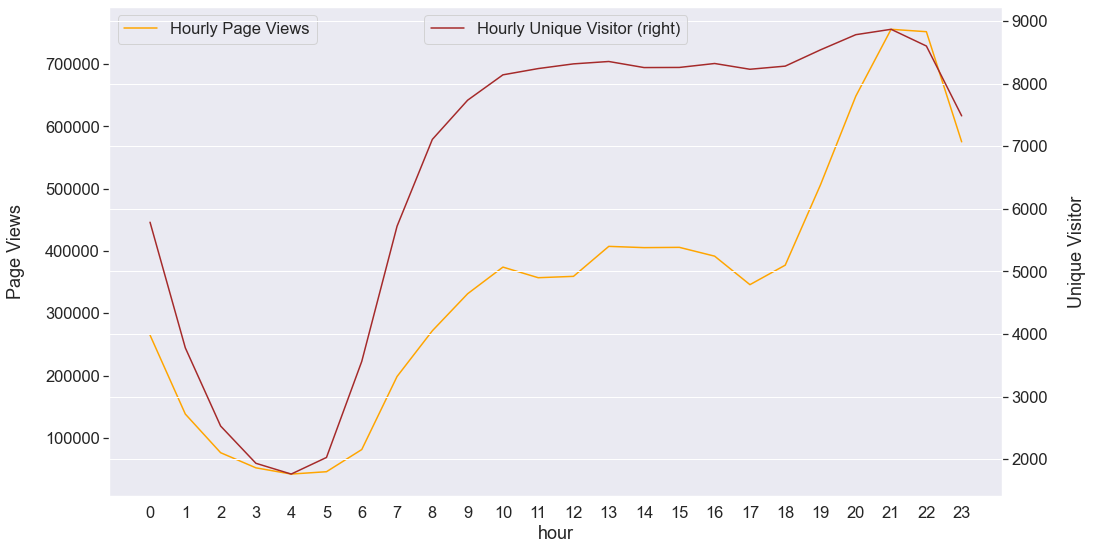

In [39]:
plt.figure(figsize = (16, 9))

pv_uv_hourly['hourly pv'].plot(color = 'orange', label = 'Hourly Page Views')
plt.ylabel('Page Views', labelpad = 20)
plt.xticks(range(0, 24), pv_uv_hourly.index)
plt.legend(loc = 'best')

pv_uv_hourly['hourly uv'].plot(color = 'brown', label = 'Hourly Unique Visitor', secondary_y = True)
plt.ylabel('Unique Visitor', labelpad = 20)
plt.legend(loc = 'upper center')

plt.grid(True)
plt.show()

### 5. Hourly PV by different Behavior Type

In [40]:
# Calculate hourly page view by diffierent behavior types
hourly_pv_bt = pd.pivot_table(columns = 'behavior_type', 
                       index = 'hour', 
                       data = app_data,
                       values = 'user_id',
                       aggfunc = np.size)
hourly_pv_bt

behavior_type       1      2      3     4
hour                                     
0              235979  10957  13652  4405
1              123931   6231   6537  1491
2               68462   3279   3703   726
3               46794   2250   2378   450
4               37445   1962   2091   367
5               41025   2029   2147   422
6               73035   3590   3658   941
7              183944   5853   6862  1836
8              251026   7785   9727  3359
9              303106  10402  12611  5228
10             340540  11129  15727  6752
11             324862  10871  14857  6516
12             328545   9885  14537  6323
13             371821  11644  16897  7066
14             370471  11638  16607  6686
15             370382  11971  16793  6712
16             358491  11060  15864  6297
17             317306   9703  14053  4897
18             347773  10306  14444  4737
19             468209  13885  18335  5908
20             600554  16510  24230  7304
21             697820  20312  29573  8230
22             692121  20231  31586  8147
23             525436  17436  26502  5872

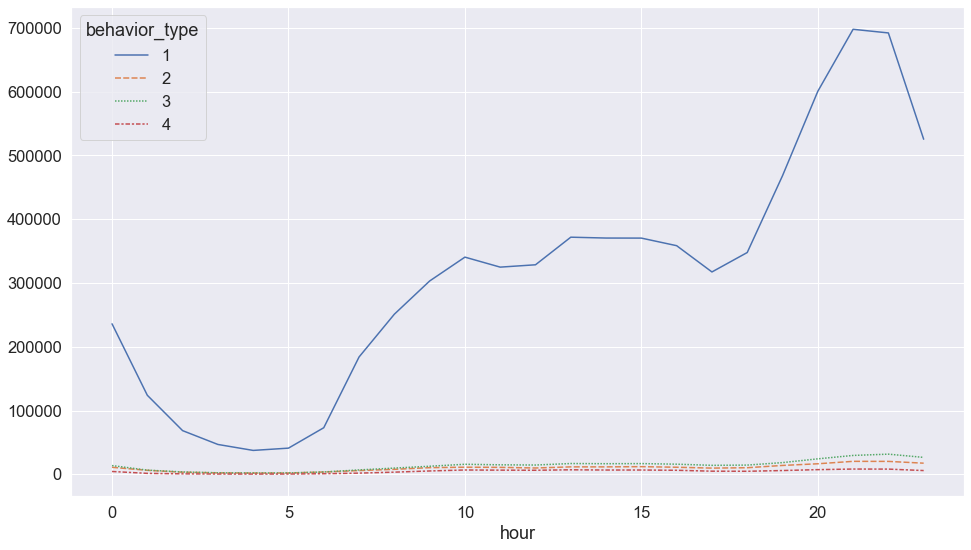

In [41]:
# 1 - Click: is not on the same dimensional level with the other three types
plt.figure(figsize = (16, 9))
sns.lineplot(data = hourly_pv_bt)
plt.show()

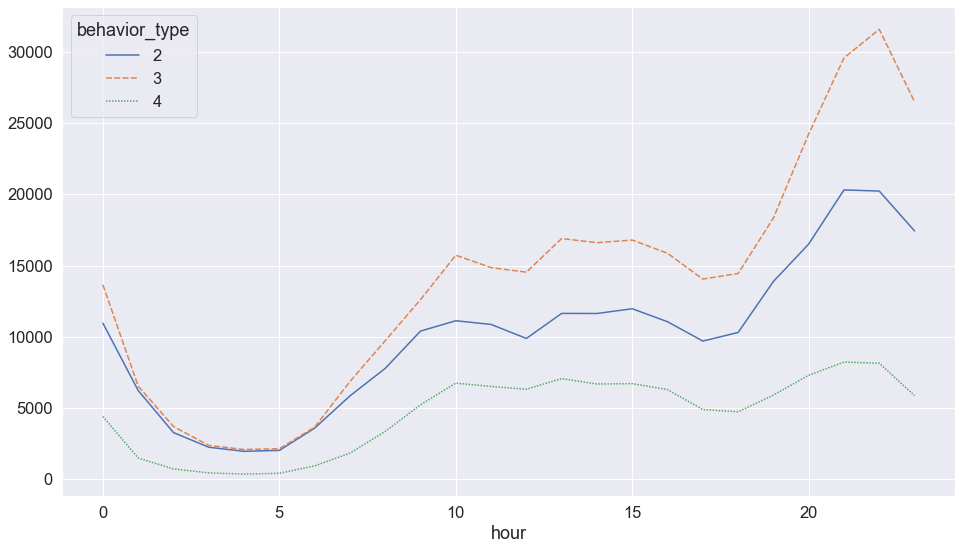

In [42]:
# Visualized 2, 3, 4
plt.figure(figsize = (16, 9))
sns.lineplot(data = hourly_pv_bt.iloc[:,1:])
plt.show()

### 6. User Purchase Analysis

#### 6.1 Check the number of order placed by each user

In [43]:
# Obtain the records of order placed by users
buy_data = app_data[app_data.behavior_type == '4'].groupby('user_id').size()

In [44]:
buy_data

user_id
100001878    36
100011562     3
100012968    13
100014060    24
100024529    25
             ..
99960313      8
9996155       5
99963140     19
99968428     34
99989881     17
Length: 8886, dtype: int64

In [45]:
buy_data.describe()

count    8886.000000
mean       12.454648
std        17.734442
min         1.000000
25%         4.000000
50%         8.000000
75%        16.000000
max       770.000000
dtype: float64

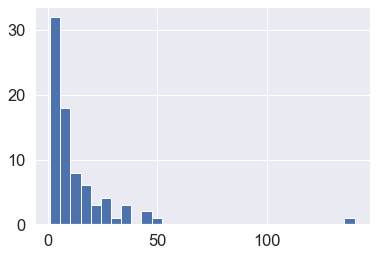

In [46]:
plt.hist(x = buy_data[1: 80], bins = 30)
plt.show()

#### 6.2 Calculate Daily ARPPU 
1. Use daily total orders placed instead of total revenue in this case
2. Count daily total numbers of paying users

In [47]:
app_data.head()

user_id    item_id behavior_type user_geohash item_category       time  \
6      814199  159370465             2          NaN          9053 2014-11-18   
11   94148058  398500235             1          NaN           552 2014-11-18   
14   40459733   65322515             1          NaN          8561 2014-11-18   
17  120148968  355626402             3          NaN          5232 2014-11-18   
30   93080101  282952494             1          NaN           108 2014-11-18   

         date  hour  
6  2014-11-18     0  
11 2014-11-18     0  
14 2014-11-18     0  
17 2014-11-18     0  
30 2014-11-18     0

In [48]:
# Calculate daily total orders placed
daily_orders = app_data[app_data.behavior_type == '4'].groupby('date').count()['behavior_type']

In [49]:
# Calculate daily total users who placed orders
paying_user = app_data[app_data.behavior_type == '4'].groupby('date').nunique()['user_id']

In [50]:
user_daily_orders = pd.concat([daily_orders, paying_user], axis = 1)

In [51]:
user_daily_orders.columns = ['total_orders','total_paying_users']
user_daily_orders.head()

total_orders  total_paying_users
date                                        
2014-11-18          3416                1539
2014-11-19          3350                1511
2014-11-20          3168                1492
2014-11-21          2723                1330
2014-11-22          3208                1411

In [52]:
# Calculate daily ARPPU
daily_arppu = user_daily_orders.total_orders / user_daily_orders.total_paying_users
daily_arppu

date
2014-11-18    2.219623
2014-11-19    2.217075
2014-11-20    2.123324
2014-11-21    2.047368
2014-11-22    2.273565
2014-11-23    2.151114
2014-11-24    2.066273
2014-11-25    2.122912
2014-11-26    2.190989
2014-11-27    2.216765
2014-11-28    2.054785
2014-11-29    2.142338
2014-11-30    2.175359
2014-12-01    2.138805
2014-12-02    2.105994
2014-12-03    2.086623
2014-12-04    2.124921
2014-12-05    1.987944
2014-12-06    2.101928
2014-12-07    2.149679
2014-12-08    2.032237
2014-12-09    2.195941
2014-12-10    2.071429
2014-12-11    2.075914
2014-12-12    3.674878
2014-12-13    2.071014
2014-12-14    2.144090
2014-12-15    2.131530
2014-12-16    2.135152
2014-12-17    2.103822
2014-12-18    2.148196
dtype: float64

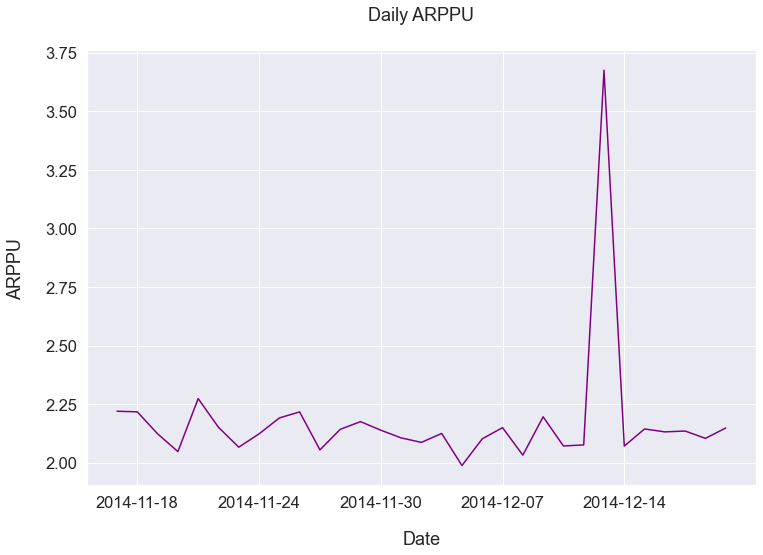

In [53]:
plt.figure(figsize = (12,8))
plt.plot(daily_arppu, color = 'purple')
plt.xticks(daily_arppu.index[1:31:6], 
           labels = ['2014-11-18','2014-11-24','2014-11-30','2014-12-07','2014-12-14'])
plt.xlabel('Date', labelpad = 20)
plt.ylabel('ARPPU', labelpad = 20)
plt.title('Daily ARPPU', pad = 30)

plt.show()

In [54]:
daily_arppu.describe()

count    31.000000
mean      2.176825
std       0.284859
min       1.987944
25%       2.081269
50%       2.131530
75%       2.163236
max       3.674878
dtype: float64

#### 6.3 Calculate Daily ARPU

1. Use daily total orders placed instead of total revenue in this case
2. Count daily total active users

In [55]:
# Calculate daily total orders placed
daily_orders = app_data[app_data.behavior_type == '4'].groupby('date').count()['behavior_type']
daily_orders.head()

date
2014-11-18    3416
2014-11-19    3350
2014-11-20    3168
2014-11-21    2723
2014-11-22    3208
Name: behavior_type, dtype: int64

In [56]:
# Calculate total active users
active_users = app_data.groupby('date').nunique()['user_id']
active_users.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [57]:
daily_active = pd.concat([daily_orders, active_users], axis =1)
daily_active.columns = ['total_orders', 'active_users']
daily_active.head()

total_orders  active_users
date                                  
2014-11-18          3416          6343
2014-11-19          3350          6420
2014-11-20          3168          6333
2014-11-21          2723          6276
2014-11-22          3208          6187

In [58]:
daily_arpu = daily_active.total_orders / daily_active.active_users
daily_arpu

date
2014-11-18    0.538546
2014-11-19    0.521807
2014-11-20    0.500237
2014-11-21    0.433875
2014-11-22    0.518507
2014-11-23    0.484701
2014-11-24    0.483495
2014-11-25    0.500394
2014-11-26    0.512506
2014-11-27    0.532316
2014-11-28    0.478753
2014-11-29    0.473972
2014-11-30    0.523123
2014-12-01    0.541565
2014-12-02    0.509618
2014-12-03    0.537737
2014-12-04    0.515694
2014-12-05    0.466154
2014-12-06    0.473913
2014-12-07    0.469636
2014-12-08    0.480195
2014-12-09    0.477917
2014-12-10    0.449038
2014-12-11    0.436321
2014-12-12    1.855052
2014-12-13    0.473436
2014-12-14    0.484253
2014-12-15    0.510977
2014-12-16    0.523555
2014-12-17    0.497215
2014-12-18    0.506533
dtype: float64

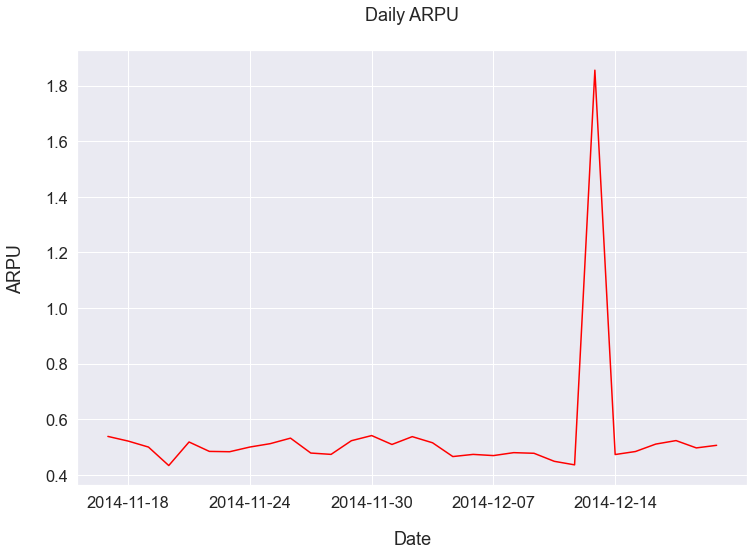

In [59]:
plt.figure(figsize = (12, 8))
plt.plot(daily_arpu, color = 'red')
plt.xticks(daily_arpu.index[1:31:6],
           labels = ['2014-11-18','2014-11-24','2014-11-30','2014-12-07','2014-12-14'])
plt.xlabel('Date', labelpad = 20)
plt.ylabel('ARPU', labelpad = 20)
plt.title('Daily ARPU', pad = 30)

plt.show()

In [60]:
daily_arpu.describe()

count    31.000000
mean      0.539066
std       0.245924
min       0.433875
25%       0.475944
50%       0.500237
75%       0.520157
max       1.855052
dtype: float64

#### 6.4 Calculate Order Conversion Rate
1. Count the number of paying users
2. Count the number of active users

In [61]:
# Calculate the number of paying users
pay_user = app_data[app_data.behavior_type == '4'].groupby('date').nunique()['user_id']
pay_user.head()

date
2014-11-18    1539
2014-11-19    1511
2014-11-20    1492
2014-11-21    1330
2014-11-22    1411
Name: user_id, dtype: int64

In [62]:
# Calculate the number of active users
active_user = app_data.groupby('date').nunique()['user_id']
active_user.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [63]:
pay_active_user = pd.concat([pay_user, active_user], axis = 1)
pay_active_user.columns = ['pay_user', 'active_user']
pay_active_user.head()

pay_user  active_user
date                             
2014-11-18      1539         6343
2014-11-19      1511         6420
2014-11-20      1492         6333
2014-11-21      1330         6276
2014-11-22      1411         6187

In [64]:
# Calculate the conversion rate
pay_rate = pay_active_user.pay_user / pay_active_user.active_user
pay_rate

date
2014-11-18    0.242630
2014-11-19    0.235358
2014-11-20    0.235591
2014-11-21    0.211918
2014-11-22    0.228059
2014-11-23    0.225326
2014-11-24    0.233994
2014-11-25    0.235711
2014-11-26    0.233915
2014-11-27    0.240132
2014-11-28    0.232994
2014-11-29    0.221240
2014-11-30    0.240477
2014-12-01    0.253209
2014-12-02    0.241985
2014-12-03    0.257707
2014-12-04    0.242689
2014-12-05    0.234490
2014-12-06    0.225466
2014-12-07    0.218468
2014-12-08    0.236289
2014-12-09    0.217636
2014-12-10    0.216777
2014-12-11    0.210183
2014-12-12    0.504793
2014-12-13    0.228601
2014-12-14    0.225855
2014-12-15    0.239723
2014-12-16    0.245207
2014-12-17    0.236339
2014-12-18    0.235795
dtype: float64

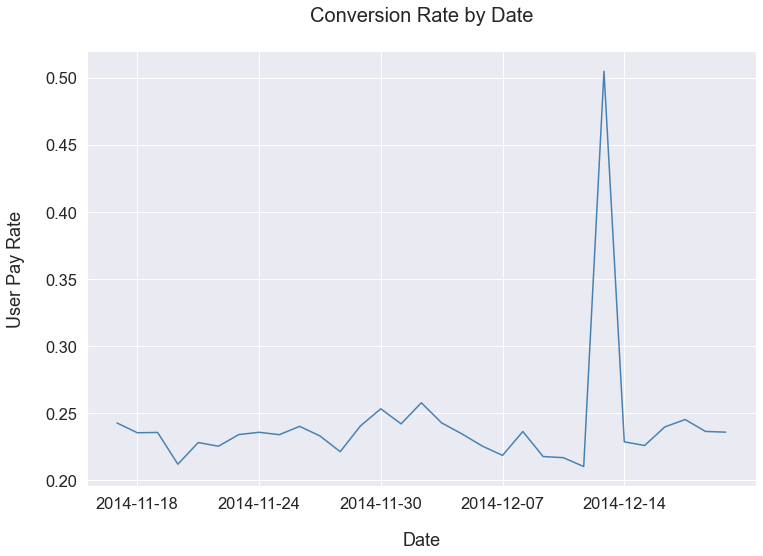

In [65]:
plt.figure(figsize = (12, 8))
plt.plot(pay_rate, color = 'steelblue')
plt.xticks(pay_rate.index[1:31:6],
           labels = ['2014-11-18','2014-11-24','2014-11-30','2014-12-07','2014-12-14'])
plt.xlabel('Date', labelpad = 20)
plt.ylabel('User Pay Rate', labelpad = 20)
plt.title('Conversion Rate by Date', fontsize = 20, pad = 30)

plt.show()

In [66]:
pay_rate.describe()

count    31.000000
mean      0.241566
std       0.050087
min       0.210183
25%       0.225660
50%       0.235358
75%       0.240304
max       0.504793
dtype: float64

#### 6.5 Calculate hourly order frequency per user

In [67]:
app_data.head(3)

user_id    item_id behavior_type user_geohash item_category       time  \
6     814199  159370465             2          NaN          9053 2014-11-18   
11  94148058  398500235             1          NaN           552 2014-11-18   
14  40459733   65322515             1          NaN          8561 2014-11-18   

         date  hour  
6  2014-11-18     0  
11 2014-11-18     0  
14 2014-11-18     0

In [68]:
user_hourly_order = app_data[app_data.behavior_type == '4'].groupby(['date', 'hour', 'user_id']).count()['behavior_type']
user_hourly_order

date        hour  user_id  
2014-11-18  0     101461439    2
                  101778477    1
                  106976106    1
                  110037242    1
                  112142417    3
                              ..
2014-12-18  23    92892459     1
                  93509038     1
                  95064712     1
                  95528086     1
                  97485804     1
Name: behavior_type, Length: 65223, dtype: int64

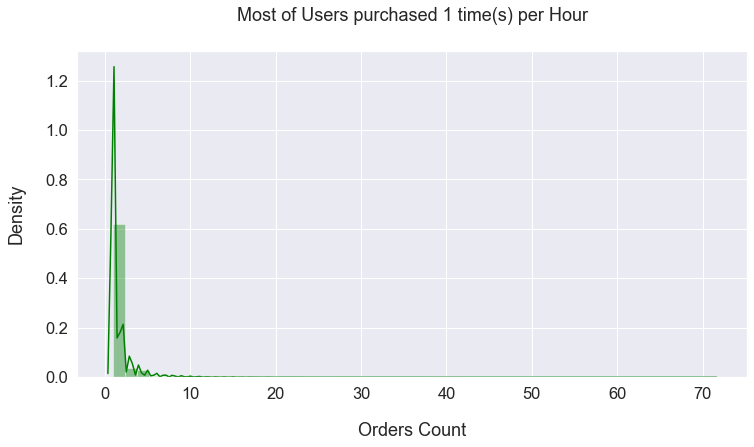

In [69]:
plt.figure(figsize = (12, 6))
sns.distplot(user_hourly_order, color = 'green')
plt.xlabel('Orders Count', labelpad = 20)
plt.ylabel('Density', labelpad = 20)
plt.title('Most of Users purchased {} time(s) per Hour'.format(user_hourly_order.mode()[0]), pad = 30)
plt.show()

In [70]:
user_hourly_order.describe()

count    65223.000000
mean         1.696825
std          1.934799
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         71.000000
Name: behavior_type, dtype: float64

#### 6.6 Calculate order frequency per hour

In [71]:
hourly_order = app_data[app_data.behavior_type == '4'].groupby(['date', 'hour']).count()['behavior_type']
hourly_order

date        hour
2014-11-18  0        91
            1        33
            2        27
            3        13
            4         6
                   ... 
2014-12-18  19      164
            20      239
            21      241
            22      230
            23      197
Name: behavior_type, Length: 744, dtype: int64

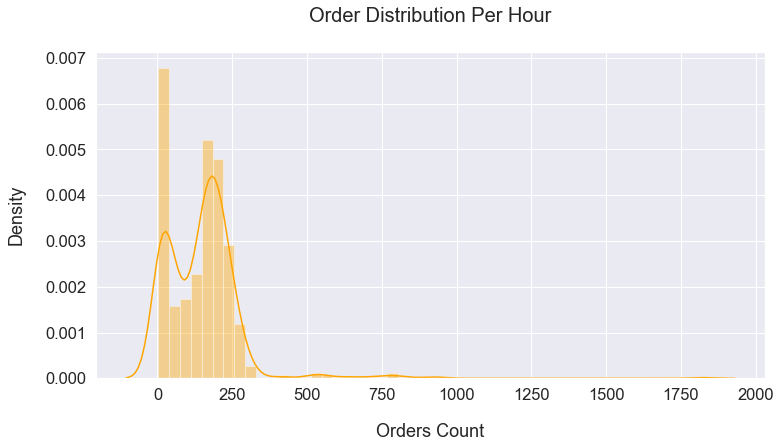

In [72]:
plt.figure(figsize = (12, 6))
sns.distplot(hourly_order, color = 'orange')
plt.xlabel('Orders Count', labelpad = 20)
plt.ylabel('Density', labelpad = 20)
plt.title('Order Distribution Per Hour', fontsize = 20, pad = 30)
plt.show()

In [73]:
hourly_order.describe()

count     744.000000
mean      148.752688
std       133.689585
min         2.000000
25%        39.000000
50%       159.000000
75%       201.000000
max      1824.000000
Name: behavior_type, dtype: float64

### 7. Customer Retention Analysis

#### 7.1 retention rate = retentioned customer / purchased user
1. customers purchased again in or more than 2 days treated as retention customers
2. If several purchases made within 1 day, only count once

In [74]:
# Calculate purchased user
buy_user = app_data[app_data.behavior_type == '4'].groupby('user_id').nunique()['date'].reset_index()
buy_user.columns = ['user_id', 'buy_times']
buy_user.head()

user_id  buy_times
0  100001878         15
1  100011562          3
2  100012968         11
3  100014060         12
4  100024529          9

In [75]:
# Calculate retention rate
retention_rate = buy_user[buy_user.buy_times >= 2].count()['buy_times'] / buy_user.count()['buy_times']
retention_rate

0.8717083051991897

#### 87.17% users are retention users.

#### 7.2 Retention time period distribution analysis

In [76]:
app_data.head()

user_id    item_id behavior_type user_geohash item_category       time  \
6      814199  159370465             2          NaN          9053 2014-11-18   
11   94148058  398500235             1          NaN           552 2014-11-18   
14   40459733   65322515             1          NaN          8561 2014-11-18   
17  120148968  355626402             3          NaN          5232 2014-11-18   
30   93080101  282952494             1          NaN           108 2014-11-18   

         date  hour  
6  2014-11-18     0  
11 2014-11-18     0  
14 2014-11-18     0  
17 2014-11-18     0  
30 2014-11-18     0

In [77]:
# Group by user_id, sort by date and then calculate the days different between purchase
buy_days_diff = app_data[app_data.behavior_type == '4'].groupby('user_id')
buy_days_diff = buy_days_diff.date.apply(lambda x: x.sort_values().diff(1).dropna())

In [78]:
buy_days_diff

user_id            
100001878  2439076    6 days
           2439090    0 days
           2440428    0 days
           2660355    1 days
           2672617    0 days
                       ...  
99989881   8203371    4 days
           9248497    3 days
           9249028    0 days
           10601909   2 days
           11085567   1 days
Name: date, Length: 101786, dtype: timedelta64[ns]

In [79]:
# Extract the days
buy_days_diff = buy_days_diff.map(lambda x: x.days)

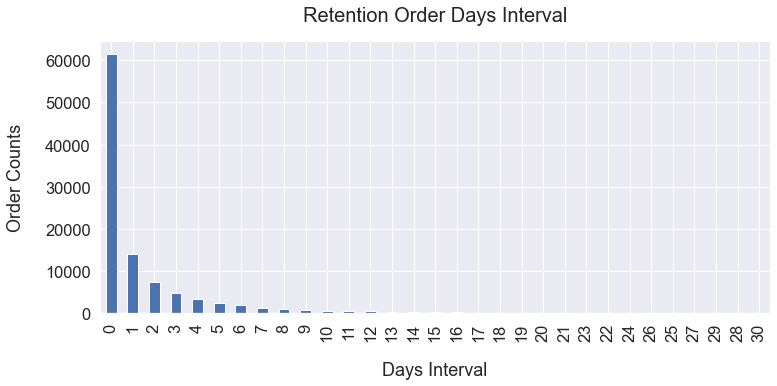

In [80]:
plt.figure(figsize = (12, 5))
buy_days_diff.value_counts().plot(kind='bar')
plt.xlabel('Days Interval', labelpad = 20)
plt.ylabel('Order Counts', labelpad = 20)
plt.title('Retention Order Days Interval', fontsize = 20, pad = 20)
plt.show()

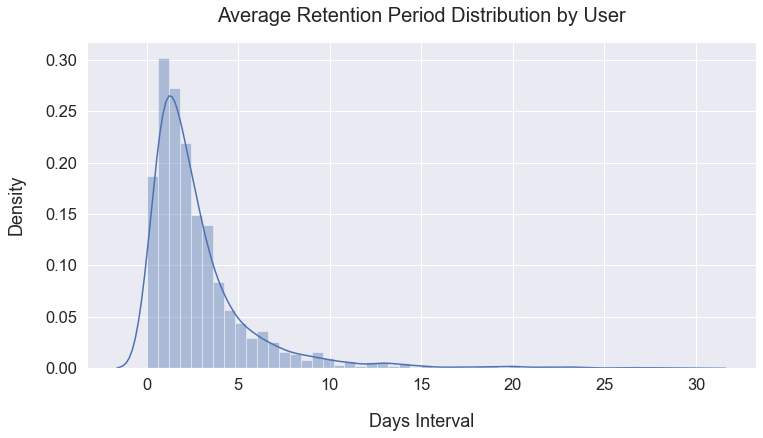

In [81]:
plt.figure(figsize = (12, 6))
sns.distplot(buy_days_diff.reset_index().groupby('user_id').date.mean())
plt.xlabel('Days Interval', labelpad = 20)
plt.ylabel('Density', labelpad = 20)
plt.title('Average Retention Period Distribution by User', fontsize = 20, pad = 20)
plt.show()

### 8. Funnel Analysis
behavior_type:
1 - Click;
2 - Favourite;
3 - Add to Cart;
4 - Place Order.

#### 8.1 Calculate the churn rate between each process

In [82]:
# Calculate number of different behavior types
diff_behavior = app_data.groupby('behavior_type').size()
diff_behavior

behavior_type
1    7479078
2     240919
3     333371
4     110672
dtype: int64

In [83]:
# Calculate total Page Views
pv_all = app_data['user_id'].count()
pv_all

8164040

In [84]:
# Calculate the churn rate from page view to click
pv_to_click = (pv_all - diff_behavior[0]) / pv_all
print('The Churn Rate from Page Views to Click: {:.2%}'.format(pv_to_click))

The Churn Rate from Page Views to Click: 8.39%


In [85]:
# Calculate the churn rate from click to add to cart
click_to_cart = (diff_behavior[0] - diff_behavior[2]) / diff_behavior[0]
print('The Churn Rate from Click to Add to cart: {:.2%}'.format(click_to_cart))

The Churn Rate from Click to Add to cart: 95.54%


In [86]:
# Calculate the churn rate from cart to favourite
click_to_fav = (diff_behavior[0] - diff_behavior[1]) / diff_behavior[0]
print('The Churn Rate from Click to Favourite: {:.2%}'.format(click_to_fav))

The Churn Rate from Click to Favourite: 96.78%


In [87]:
# Calculate the churn rate from favourite to buy
cart_to_fav = (diff_behavior[2] - diff_behavior[1]) / diff_behavior[2]
print('The Churn Rate from Add to Cart to Favorite: {:.2%}'.format(cart_to_fav))

The Churn Rate from Add to Cart to Favorite: 27.73%


In [88]:
# Calculate the churn rate from cart to buy
cart_to_buy = (diff_behavior[2] - diff_behavior[3]) / diff_behavior[2]
print('The Churn Rate from Add to Cart to Buy: {:.2%}'.format(cart_to_buy))

The Churn Rate from Add to Cart to Buy: 66.80%


#### 8.2 Funnel Chart

In [89]:
import plotly.express as px
data = dict(number=[100, 91.61, 4.09, 2.96, 1.34],
            stage=['Page View', 'Click', 'Add to Cart', 'Favourite', 'Buy'])
fig = px.funnel(data, x = 'number', y = 'stage')
fig.show()

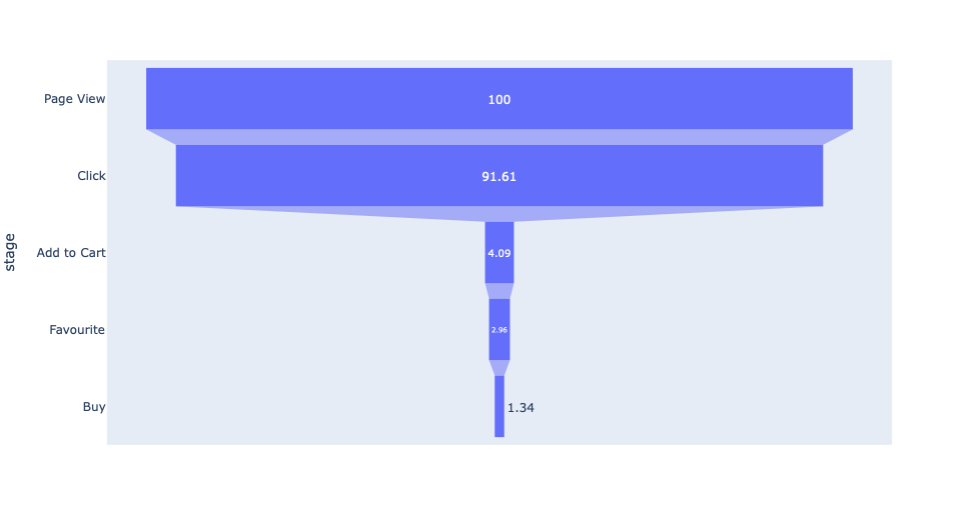

### 9. RFM Analysis

In [90]:
from datetime import datetime

In [91]:
# Obtain the date interval between the lastest purchase date and reference date by user
r_day = app_data[app_data.behavior_type == '4'].groupby('user_id')['date'].apply(lambda x: datetime(2014,12,20)
                                                                        - x.sort_values().iloc[-1])

In [92]:
r_day = r_day.reset_index().rename(columns = {'date': 'recent'})

In [93]:
r_day.recent = r_day.recent.apply(lambda x: x.days)
r_day

user_id  recent
0     100001878       2
1     100011562       4
2     100012968       2
3     100014060       2
4     100024529       4
...         ...     ...
8881   99960313       7
8882    9996155      13
8883   99963140       5
8884   99968428       6
8885   99989881       5

[8886 rows x 2 columns]

In [94]:
# Obtain user buy frequency
buy_freq = app_data[app_data.behavior_type == '4'].groupby('user_id').date.count()
buy_freq = buy_freq.reset_index().rename(columns = {'date': 'freq'})

In [95]:
buy_freq

user_id  freq
0     100001878    36
1     100011562     3
2     100012968    13
3     100014060    24
4     100024529    25
...         ...   ...
8881   99960313     8
8882    9996155     5
8883   99963140    19
8884   99968428    34
8885   99989881    17

[8886 rows x 2 columns]

In [96]:
rfm = pd.merge(r_day, buy_freq, left_on = 'user_id', right_on = 'user_id')

In [97]:
rfm.describe()

recent         freq
count  8886.000000  8886.000000
mean      7.811839    12.454648
std       6.678478    17.734442
min       2.000000     1.000000
25%       3.000000     4.000000
50%       6.000000     8.000000
75%       9.000000    16.000000
max      32.000000   770.000000

In [98]:
# Split to 2 scores with equal frequency
rfm['recent_value'] = pd.qcut(rfm.recent, 2, labels = ['2','1'])
rfm['freq_value'] = pd.qcut(rfm.freq, 2, labels = ['1', '2'])
rfm['rfm'] = rfm['recent_value'].str.cat(rfm['freq_value'])

In [99]:
rfm

user_id  recent  freq recent_value freq_value rfm
0     100001878       2    36            2          2  22
1     100011562       4     3            2          1  21
2     100012968       2    13            2          2  22
3     100014060       2    24            2          2  22
4     100024529       4    25            2          2  22
...         ...     ...   ...          ...        ...  ..
8881   99960313       7     8            1          1  11
8882    9996155      13     5            1          1  11
8883   99963140       5    19            2          2  22
8884   99968428       6    34            2          2  22
8885   99989881       5    17            2          2  22

[8886 rows x 6 columns]

In [100]:
def trans_value(x):
    if x == '22':
        return 'Best Users'
    elif x == '21':
        return 'Promising Users'
    elif x == '12':
        return "Can't Lose Them"
    else: 
        return 'About to Lose'

rfm['category']=rfm['rfm'].apply(trans_value)
rfm['category'].value_counts()

Best Users         3089
About to Lose      2851
Promising Users    1811
Can't Lose Them    1135
Name: category, dtype: int64

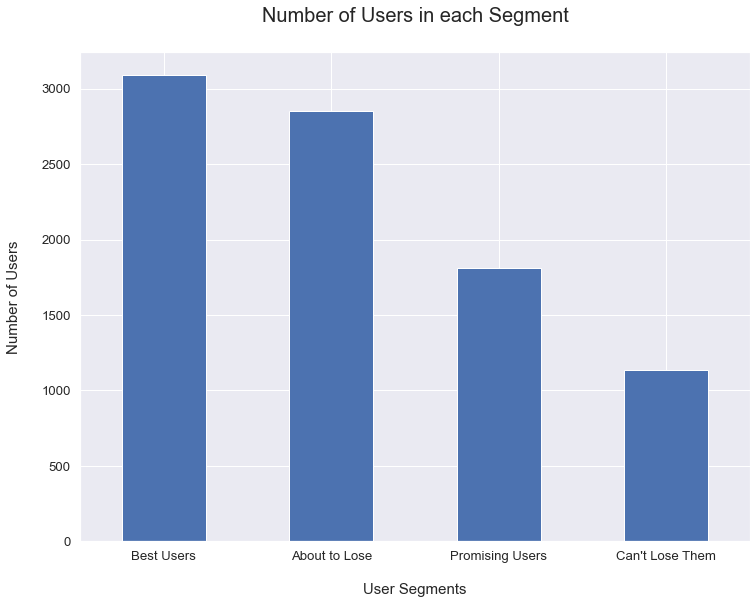

In [101]:
sns.set(style = 'darkgrid', 
        context = 'notebook',
        font_scale = 1.2)
cust = rfm['category'].value_counts().plot(kind = 'bar', figsize = (12,9))
cust.set_xlabel('User Segments', fontsize = 15, labelpad = 20)
cust.set_ylabel('Number of Users', fontsize = 15, labelpad = 20)
cust.set_title('Number of Users in each Segment', fontsize = 20, pad = 30)
plt.xticks(rotation = 360)
plt.show()

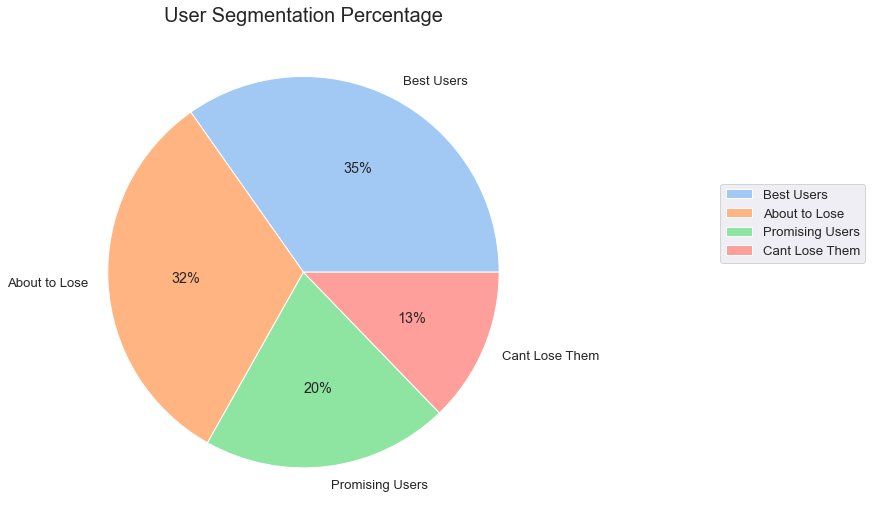

In [102]:
plt.figure(figsize = (12, 9))
data = rfm['category'].value_counts()
labels = ['Best Users', 'About to Lose', 'Promising Users', 'Cant Lose Them']
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels,colors = colors, autopct = '%0.0f%%')
plt.legend(loc = 'center', bbox_to_anchor = (1.5, 0.6))
plt.title('User Segmentation Percentage', size = 20)
plt.show()

## Results Obtained from Data Analysis

### 1. PV and UV:
#### 1) Daily PV and UV:
a. Based on the Spearman (0.91) and Pearson (0.95) correlations, daily PV and UV has a strong positive relationship;\
b. Except 12/12/2014, the fluctuation of the other days is relatively smooth, since 12/12 was shopping festival, both PV and UV jumped to a peak value.

#### 2) Hourly PV and UV
a. Based on the Spearman (0.92) and Pearson (0.85) correlations, hourly PV and UV also has a strong positive relationship;\
b. The trend for both Hourly PV and UV is going down between 0am to 5am. Starting for 6am to 10am, hourly PV and UV are going up, then flatten out. However, hourly PV increases sharply during 6pm to 9pm, and hourly UV tends to be stable, most likely the users are during after hours and can spend more time online shopping. After 9pm, both PV and UV start to going down. **So 6pm to 9pm is the active time period for this online shopping app and their unique visitors are tend to be stable after 10am.**\
c. The trends on hourly PV of different behavior types are very similar to the trends on hourly PV, they start to go down from 10pm to 5am, gradually increase from 5am to 10am and start to flatten until 6pm then jump up during 6pm to 9pm. The ‘click’ type is not on the same dimensional level of the other three, which is normal, and ‘add to cart’ is more than ‘favorite’, ‘favorite’ is more than ‘purchase’, which conform to user behaviors.

### 2. The average number of orders placed by each app users are from 12 to 16 times, so we need to focus on the users who placed around 14 orders. The maximum number of orders placed are 770 times and minimum are 1 time.

### 3. User Purchase Analysis
Since the dataset does not contain purchase amount, so we use total numbers of orders placed instead.
#### 1) ARPPU:
Based on the result of ARPPU, the daily average number of orders placed by each paying user are around 2 orders, and the maximum are nearly 4 orders.
#### 2) ARPU:
Based on the result of ARPU, the daily average number of orders placed by each active user are less than 1 order, the maximum is nearly 2 orders.
#### 3) Conversion Rate:
The average order conversion rate is about 24% and it achieved the peak value of 50% on 12/12. Most of the users purchased 1 to 2 times per hour and the average orders placed in app per hour is around 150 orders, the maximum orders placed reaches 1824 orders.

### 4. Customer retention analysis:
1) 87.17% of app users are retention users;\
2) Most of the users will come back and place more orders within 5 days, the longer the days increased, the less orders user placed;
#### Thus, we need to focus on the analysis of the retention orders within 5 days. The average retention time period by different users is close to the normal distribution.

### 5. Funnel Analysis: the churn rates between each process are as following,
1) Page Views to Click: 8.39% \
2) Click to Add to Cart: 95.54% \
3) Click to Favorite: 96.78% \
4) Add to Cart to Favorite: 27.73% \
5) Add to Cart to Place Order: 66.80%
#### The users are dropping off extremely from click to add to cart and favorite, and also from add to cart to place order. These two parts has the most opportunities for improvement.

### 6. RMF Analysis:
1) **35% ‘Best Users’:** This part of users are the most valuable users of the app, we need to pay more attention to these users, it is important to keep these users still active and also attract them to place more orders;\
2) **32% ‘About to Lose:** It is important to keep pushing notifications on the product, and promotional info to increase the amount of product exposure, and avoid losing these users. Furthermore, we need to analyze on the interest and needs of this part of users, so that we can generate a more targeted way to promote products and services;\
3) **20% ‘Promising Users’:** we can send some promotion or bundle sales to this part of users to increase on their order frequency and retention rate;\
4) **13% ‘Can’t Lose Them’:** It is important to attract these users to place orders on app again, we can push more notifications and bring more traffic to the app through external ads. 